# Intro till Pandas
- Series oject1
- Dataframe object 

In [4]:
import pandas as pd
data = dict(AI = 25, Net = 30, App = 27, Java = 23)
series = pd.Series(data = data)
series

AI      25
Net     30
App     27
Java    23
dtype: int64

In [7]:
data2 = dict(AI = 25, Net = 30.0, App = 27, Java = 23)
pd.Series(data2)

AI      25.0
Net     30.0
App     27.0
Java    23.0
dtype: float64

In [9]:
# extract values
print(f"Series [0]: {series[0]}")
print(f"Series [-1]: {series[-1]}")
# extract keys
print(f"Series.key: {series.keys()}")
print(f"Series.key[-2]: {series.keys()[-2]}")

Series [0]: 25
Series [-1]: 23
Series.key: Index(['AI', 'Net', 'App', 'Java'], dtype='object')
Series.key[-2]: App


# DataFrame

In [10]:
df = pd.DataFrame(series)
#print(df)
df

,0
AI,25
Net,30
App,27
Java,23


In [14]:
df = pd.DataFrame(series, columns = ("Number students",))
df

,Number students
AI,25
Net,30
App,27
Java,23


In [15]:
languages = pd.Series(dict(AI = "Python", Net = "C#", App = "Kotlin", Java = "JAVA"))
df = pd.DataFrame({"Students" : series, "Language" : languages})
df

,Students,Language
AI,25,Python
Net,30,C#
App,27,Kotlin
Java,23,JAVA


In [16]:
df.index #Komma åt index

Index(['AI', 'Net', 'App', 'Java'], dtype='object')

# Data selection

In [17]:
df.Students # gets a series with attribute approach

AI      25
Net     30
App     27
Java    23
Name: Students, dtype: int64

In [18]:
df["Students"] # gets a series with dictionary_keys approach

AI      25
Net     30
App     27
Java    23
Name: Students, dtype: int64

In [19]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
Net,C#,30
App,Kotlin,27
Java,JAVA,23


In [24]:
# wants to get all rows > 24 students
print(df["Students"] > 24) # __gt__()
df["Students"] > 24
large_groups = df[df["Students"] > 24] # picked out all rows that are True
large_groups

AI       True
Net      True
App      True
Java    False
Name: Students, dtype: bool


,Students,Language
AI,25,Python
Net,30,C#
App,27,Kotlin


In [ ]:
large_groups_index

AttributeError: module 'matplotlib' has no attribute 'title'

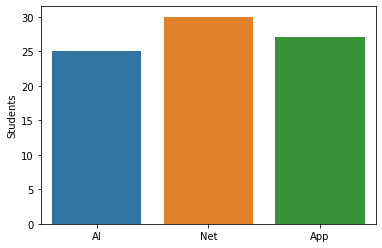

In [31]:
import seaborn as sns
import matplotlib as plt
sns.barplot(data = large_groups, x = large_groups.index, y = "Students")
plt.title("Antal studenter i olika program") # can also use seaborns methods for this

In [6]:
import pandas as pd
import seaborn as sns
calories = pd.read_excel("../Data/calories.xlsx")
calories.head(3)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ


In [11]:
calories.iloc[3:9]
calories.info() #The columns and the number of object that are non-null (i.e. have values) and the type of objects
calories.describe() #Gives statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [12]:
calories["FoodCategory"].unique() #Gets an array of the unique categories in our dataset

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [13]:
calories["per100grams"].unique() #We have 100g and 100ml, so two main categories

array(['100g', '100ml'], dtype=object)

## Data cleaning
- convert String to int
- change column names
- separate liquide and solids

In [14]:
calories = calories.rename(dict(Cals_per100grams="Calories", per100grams="per100"), axis="columns") #Rename will be applied to the rows, we therefore have to make it apply to the columns
calories.tail()

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [15]:
#use the string method and slice it at -3
#change the type to int by using astype
calories ["Calories"] = calories["Calories"].str[:-3].astype(int)
calories.head()


,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [16]:
calories ["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [17]:
solids = calories[calories["per100"] == "100g"]
liquids = calories[calories["per100"] == "100ml"]
liquids 

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ
...,...,...,...,...,...
2173,Sauces&Dressings,Soy Sauce,100ml,67,281 kJ
2182,Sauces&Dressings,Vinaigrette,100ml,120,504 kJ
2183,Sauces&Dressings,Worcestershire Sauce,100ml,78,328 kJ
2184,Sauces&Dressings,Yogurt Dressing,100ml,45,189 kJ


# Find top 5 categories with highest calories

In [19]:
solids_top5 = solids.sort_values(by="Calories", ascending=False).head()
solids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [20]:
liquids_top5 = liquids.sort_values(by = "Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,KJ_per100grams
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


<AxesSubplot:xlabel='FoodItem', ylabel='Calories'>

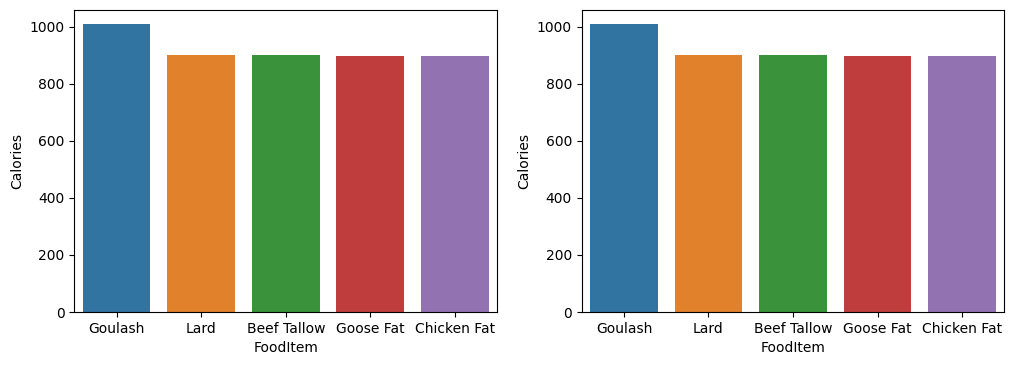

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, dpi= 100, figsize =(12, 4))
sns.barplot(data = solids_top5, x= "FoodItem", y= "Calories", ax = ax[0])
sns.barplot(data = solids_top5, x= "FoodItem", y= "Calories", ax = ax[1])